In [20]:
from pathlib import Path
from amc_parser.motion import MotionCapture
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

asf_path = Path.cwd() / 'mocap' / 'subjects' / '02' / '02.asf'

walk_amc_path = Path.cwd() / 'mocap' / 'subjects' / '02' / '02_02.amc'
run_amc_path = Path.cwd() / 'mocap' / 'subjects' / '02' / '02_03.amc'

walk_mocap = MotionCapture(asf_path, walk_amc_path)
run_mocap = MotionCapture(asf_path, run_amc_path)

walk_df = walk_mocap.as_dataframe()
run_df = run_mocap.as_dataframe()

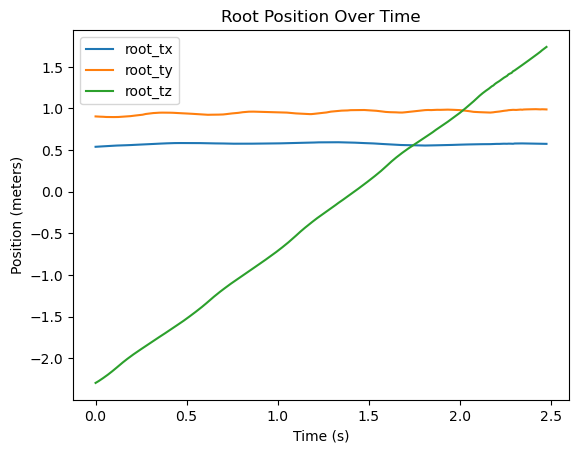

In [21]:
# plot the root_tx, root_ty, root_tz against time
walk_df.plot(x='time', y=['root_tx', 'root_ty', 'root_tz'])
plt.xlabel('Time (s)')
plt.ylabel('Position (meters)')
plt.title('Root Position Over Time')
plt.legend(['root_tx', 'root_ty', 'root_tz'])
plt.show()

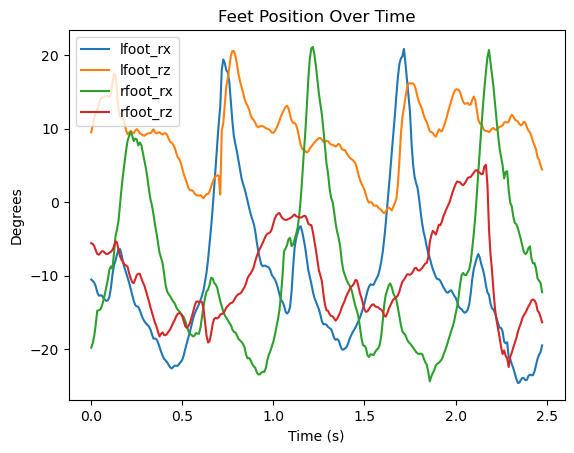

In [22]:
# Get the columns for the feet
lfoot_cols = walk_mocap.get_columns_for_joint('lfoot')
rfoot_cols = walk_mocap.get_columns_for_joint('rfoot')

# plot the left and right foot positions against time
foot_cols = lfoot_cols + rfoot_cols
walk_df.plot(x='time', y=foot_cols)
plt.xlabel('Time (s)')
plt.ylabel('Degrees')
plt.title('Feet Position Over Time')
plt.legend(foot_cols)



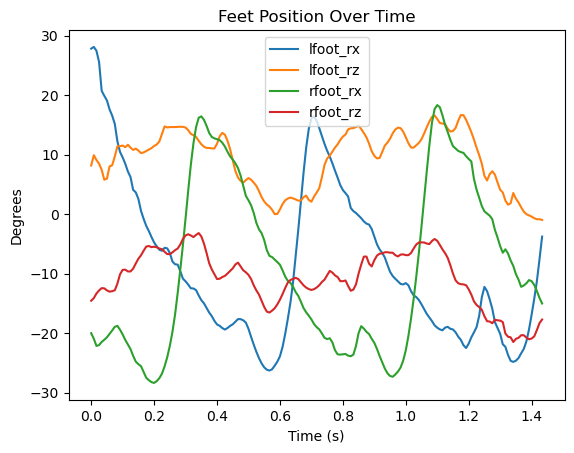

In [23]:
# Get the columns for the feet
lfoot_cols = run_mocap.get_columns_for_joint('lfoot')
rfoot_cols = run_mocap.get_columns_for_joint('rfoot')

# plot the left and right foot positions against time
foot_cols = lfoot_cols + rfoot_cols
run_df.plot(x='time', y=foot_cols)
plt.xlabel('Time (s)')
plt.ylabel('Degrees')
plt.title('Feet Position Over Time')
plt.legend(foot_cols)


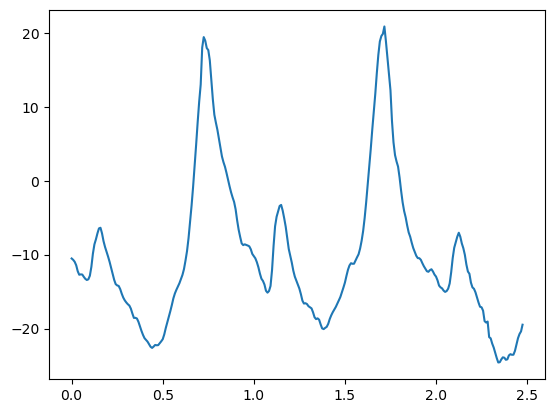

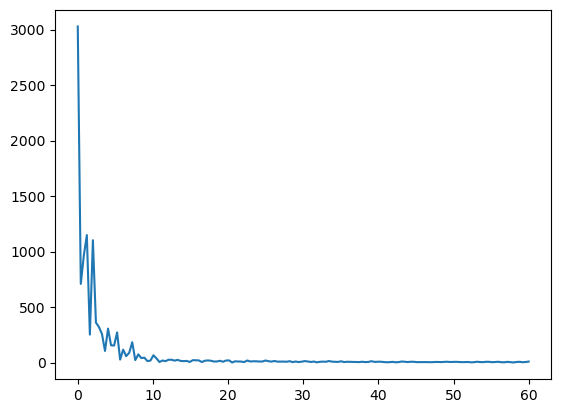

In [32]:
# get walk lfoot_rx as a numpy array
lfoot_rx = walk_df['lfoot_rx'].to_numpy()

# plot
plt.plot(walk_df['time'], lfoot_rx)

# convert lfoot_rx to frequency domain
lfoot_rx_fft = np.fft.rfft(lfoot_rx)

# plot the magnitude of the fft on a new figure
plt.figure()
plt.plot(np.fft.rfftfreq(len(lfoot_rx), d=1/120), np.abs(lfoot_rx_fft))



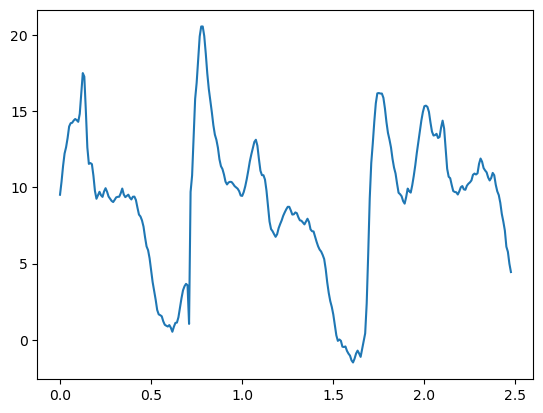

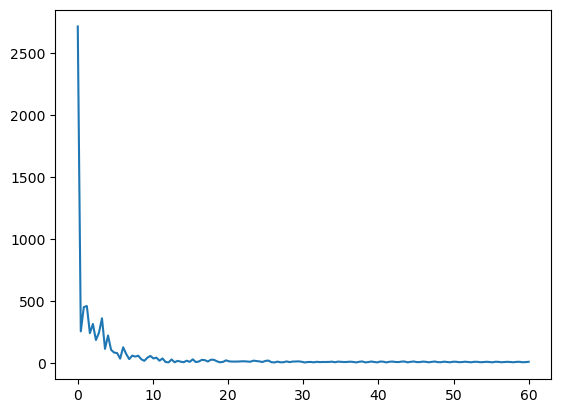

In [33]:
# get walk lfoot_rx as a numpy array
lfoot_rz = walk_df['lfoot_rz'].to_numpy()

# plot
plt.plot(walk_df['time'], lfoot_rz)

# convert lfoot_rx to frequency domain
lfoot_rz_fft = np.fft.rfft(lfoot_rz)

# plot the magnitude of the fft on a new figure
plt.figure()
plt.plot(np.fft.rfftfreq(len(lfoot_rz), d=1/120), np.abs(lfoot_rz_fft))